# MLB PLAYER DIGITAL ENGAGEMENT FORCASTING

## 1. INTRODUCTION



MLB teamed up with Google Cloud, hold this Kaggle competition to transform the fan experience through data.

In this competition, we will predict how fans engage with MLB players’ digital content on a daily basis for a future date range.

We will have access to player performance data, social media data, and team factors like market size. 

we are going to find features that are related to fan engagement such as home run, and by using the features, the model predicts the fan engagement values.



In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import mean_absolute_error
from datetime import timedelta
from functools import reduce
from tqdm import tqdm
import lightgbm as lgbm
import mlb
BASE_DIR = Path('../input/mlb-player-digital-engagement-forecasting')
TRAIN_DIR = Path('../input/mlb-pdef-train-dataset')

In [ ]:
pd.read_csv(BASE_DIR / 'example_sample_submission.csv')

Let's see an example submission that we have to submit for the competition. 

In this competition, we have to find fan engagement scores (target 1,2,3,4) by date and player with given data.

In column 0, the fan engagement result (target 1 to 4) of PlayerId 656669 on Apr 27 are all Zero.

we can guess on the date 2021 April 26 a day before the 27th, there were no games or the player did not play the game based on fan engagement values.




 If the given information is highly related to the 4 target values, we can find the most correlated features. 
 
 The first time, I guessed information such as ‘Homerun’ or ‘no-hit no run’ can be the most important features. 
 
 However, 4 target values are not correlated with these kinds of features. 
 
 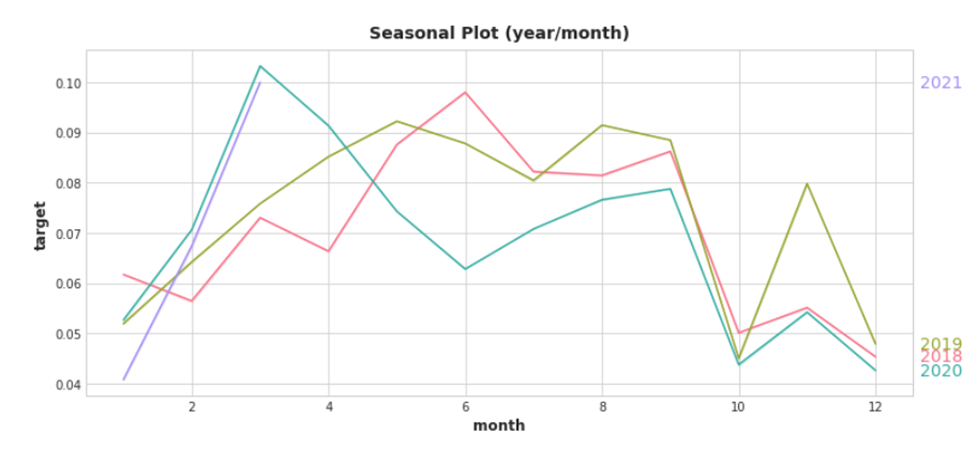
 
 **The Picture of an EDA result of 'AVG target values by Year-Month' from the Kaggle NB => https://www.kaggle.com/ryanholbrook/getting-started-with-mlb-player-digital-engagement**
 
 
 Instead of the previous hypothesis, 4 target values show some trends by time. 
 
 Therefore, this competition is similar to time series data prediction such as temperature prediction or stock price prediction.

## 2. MODEL ##


Before explaining our model, I will explain the time period of train and test data.


We got train data from **2018 to 24 April 2021**. 

Public Leader Board provides **25 April 2021 to the last day of April 2021.**

At the End of the competition, the model has to predict some other period time **later than May 1, 2021.** Which is evaluation test data.

I will call 2018 to 31 March 2021 as **train data**, 1 April 2021 to 24th April 2021 as **valid test data.**

Public Leader Board provides data from 25 April 2021 to the last day of April 2021. With train data, Most of the groups made their valid test data from 1 April 2021 to 24th April 2021.




### a. THE FIRST MODEL ###






In [ ]:
First_model_feature_cols = ['label_playerId', 'label_primaryPositionName', 'label_teamId',
       'label_status', 'battingOrder', 'gamesPlayedBatting', 'flyOuts',
       'groundOuts', 'runsScored', 'doubles', 'triples', 'homeRuns',
       'strikeOuts', 'baseOnBalls', 'intentionalWalks', 'hits', 'hitByPitch',
       'atBats', 'caughtStealing', 'stolenBases', 'groundIntoDoublePlay',
       'groundIntoTriplePlay', 'plateAppearances', 'totalBases', 'rbi',
       'leftOnBase', 'sacBunts', 'sacFlies', 'catchersInterference',
       'pickoffs', 'gamesPlayedPitching', 'gamesStartedPitching',
       'completeGamesPitching', 'shutoutsPitching', 'winsPitching',
       'lossesPitching', 'flyOutsPitching', 'airOutsPitching',
       'groundOutsPitching', 'runsPitching', 'doublesPitching',
       'triplesPitching', 'homeRunsPitching', 'strikeOutsPitching',
       'baseOnBallsPitching', 'intentionalWalksPitching', 'hitsPitching',
       'hitByPitchPitching', 'atBatsPitching', 'caughtStealingPitching',
       'stolenBasesPitching', 'inningsPitched', 'saveOpportunities',
       'earnedRuns', 'battersFaced', 'outsPitching', 'pitchesThrown', 'balls',
       'strikes', 'hitBatsmen', 'balks', 'wildPitches', 'pickoffsPitching',
       'rbiPitching', 'gamesFinishedPitching', 'inheritedRunners',
       'inheritedRunnersScored', 'catchersInterferencePitching',
       'sacBuntsPitching', 'sacFliesPitching', 'saves', 'holds', 'blownSaves',
       'assists', 'putOuts', 'errors', 'chances', 
'target1_mean',
 'target1_median',
 'target1_std',
 'target1_min',
 'target1_max',
 'target1_prob',
 'target2_mean',
 'target2_median',
 'target2_std',
 'target2_min',
 'target2_max',
 'target2_prob',
 'target3_mean',
 'target3_median',
 'target3_std',
 'target3_min',
 'target3_max',
 'target3_prob',
 'target4_mean',
 'target4_median',
 'target4_std',
 'target4_min',
 'target4_max',
 'target4_prob'
               ]


I put game features on the LightGBM model such as ‘homerun’, ‘playerId’, ‘TeamId’.
And also I include statistical data such as 'target1_median', 'target_2_std' ect... 

These are the valid test scores for our LightGBM model. **Target 1 for about 0.675, Target 2: 1.43 Target 3: 0.55 target 4: 1.12.** The average of the Mean absolute error is **0.947.** All the hyperparameters are tuned to get high valid test scores.

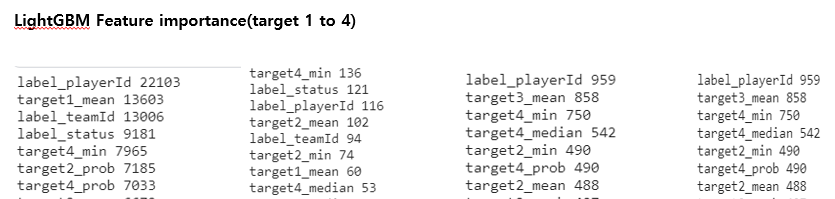


Now we will see the feature importance from target 1 to target 4.

**Player Id** is the most important feature for the target 1 prediction LightGBM model.

**Target4_min** which is one of the statistical values is the most important feature for the target 2 prediction LightGBM model.

**Player Id** is the most important feature for the target 3 prediction LightGBM model.

**Player Id** is the most important feature for the target 4 prediction LightGBM model.

This result shows **statistical information** and **player_id** is a good feature for the model. However, when we think about the result, It is common sense that a popular MLB player is always highlighted by others while a non-popular MLB player is not.



### b. THE ADVENCED MODEL ###

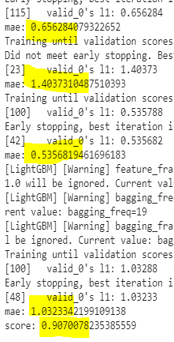
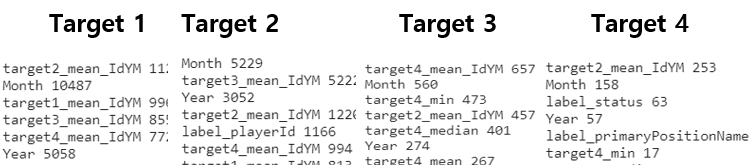

First, I tried to change statistical features. 

If we see the feature importance, most of the statistical features are highly ranked. I got the mean values of each target by applying the 'group by' function with playerId, month, and Year. The previous EDA picture gave me the idea for applying the 'group by' function with month and Year. 

In addition, the previous model’s feature importance gives me the idea for applying the 'group by' function with playerID. Also, I put Day, Month, Year to the features for the new model. I assume that the LighGBM model finds a connection between the statistical features and Day Month Years by expanding its dimension.



For the result, I reduced valid test scores from 0.95(first model valid test score) to 0.90. 

The previous valid test score is from a fully tuned model while the new model’s hyperparameter is never tuned. 
If we see the feature importance lists, we can see new features are highly ranked.

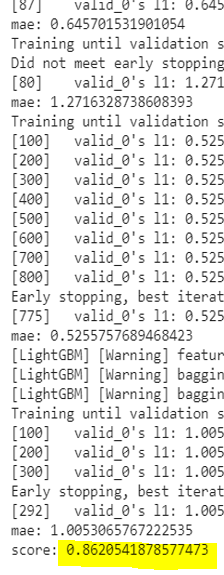

I put more statistical features into the model. 
I put not only the mean target values applying with groupby function, but also max, min std median with groupby fuction.
The valid test score became 0.86 and this score is also without any parameter tuning. 
**Even without hyperparameter tunning, the model shows a similar valid train score with many other groups who are in the top public leaderboard score.**




In this competition discussion board, many participants who got top public test scores have argued that top scores models on the boards are overfitted or used leaked data. If we see the public test data, it starts from 25 April to 30 April 2021. And Train data includes 2021 April data. The models might be fit to find a good score for the April 2021 test data. However, the competition's final private test data is starting from May 2021. Therefore, **I decided to use a totally different approach to train the model.**

### Statistical Features for the New train data
#### 1. Same month but previous year
#### Player A(May. 15. 2021) : Player A target mean value (May 2020 , May 2019)


I decided to add target mean values with the same month but the previous year each row for the train data.

If there is a May 15th, 2021 train data row for player A, I calculated target mean values of May 2020 and May 2019 and put them into features for the model.

When we compare sales revenues by quarters for a company, usually economists compare present quarter revenue with not the previous quarter's revenues but same quarter revenues in a previous year.  My first feature engineering idea came from this.


#### 2. Target mean values with previous month and next month but the previous years'
#### Player A(May. 15. 2021) : Player A harget mean value (April 2020 , Jun 2020)



If there is a May 15th, 2021 train data row for player A, I calculated target mean values of April 2020 and Jun 2020 for player A and put them into features for the model.

 Based on the EDA graph, If I want to get one of May's target values, April and Jun data can be a good feature. However, in the test set, we cannot get future-month of statistical features. Therefore, instead of 2021 April and Jun mean target values, I put 2020 April and Jun mean target values in this example case. But these features are from the previous year one, therefore, I thought it require something that helps to connect the previous year (2020) and this year(2021)


#### 3. A ratio of this year target mean values by previous year target mean values
#### Player A (May. 15. 2021):  Player A target mean value(Jan+Feb+Mar 2021) **/** Player A target mean value(Jan+Feb+Mar 2020)



To connect precious year and this year, I calculated a ratio of this year's target mean values by the previous year's target mean value. 

However, in the train data. when we think about the period of our train data, 2021 target values are ends April 25. Since Jan Feb Mar data are complete data, each year of Jan, Feb, Mar target values are used to get the ratio.
Then this can represent a hypothetical rising MLB star showing higher target values year by year with this ratio features.

#### Result for the advenced model
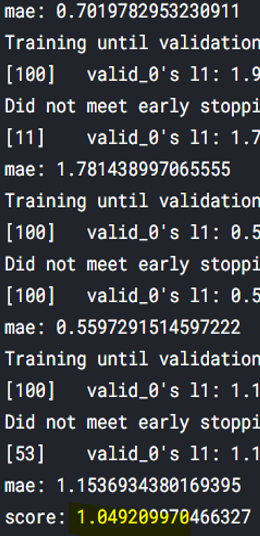
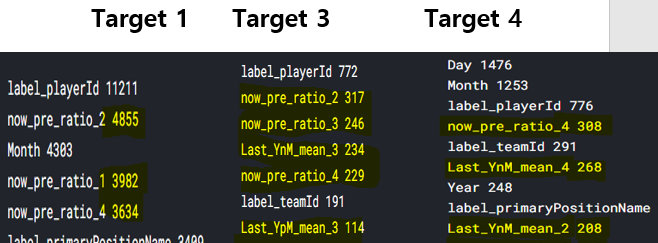



Here is the result for the advanced model.

The valid test score is not good as the previous model (0.85 to 1) however, I think this model is made by my logical sequence to avoid overfitting. According to the feature importance result,**surprisingly this model seems to found some relationships between player, date, and feature that I made.**

In [ ]:
players = pd.read_csv(BASE_DIR / 'players.csv')
rosters = pd.read_pickle(TRAIN_DIR / 'rosters_train.pkl')
targets = pd.read_pickle(TRAIN_DIR / 'nextDayPlayerEngagement_train.pkl')
scores = pd.read_pickle(TRAIN_DIR / 'playerBoxScores_train.pkl')
scores = scores.groupby(['playerId', 'date']).sum().reset_index()

In [ ]:
targets_cols = ['playerId', 'target1', 'target2', 'target3', 'target4', 'date']
players_cols = ['playerId', 'primaryPositionName']
rosters_cols = ['playerId', 'teamId', 'status', 'date']
scores_cols = ['playerId', 'battingOrder', 'gamesPlayedBatting', 'flyOuts',
       'groundOuts', 'runsScored', 'doubles', 'triples', 'homeRuns',
       'strikeOuts', 'baseOnBalls', 'intentionalWalks', 'hits', 'hitByPitch',
       'atBats', 'caughtStealing', 'stolenBases', 'groundIntoDoublePlay',
       'groundIntoTriplePlay', 'plateAppearances', 'totalBases', 'rbi',
       'leftOnBase', 'sacBunts', 'sacFlies', 'catchersInterference',
       'pickoffs', 'gamesPlayedPitching', 'gamesStartedPitching',
       'completeGamesPitching', 'shutoutsPitching', 'winsPitching',
       'lossesPitching', 'flyOutsPitching', 'airOutsPitching',
       'groundOutsPitching', 'runsPitching', 'doublesPitching',
       'triplesPitching', 'homeRunsPitching', 'strikeOutsPitching',
       'baseOnBallsPitching', 'intentionalWalksPitching', 'hitsPitching',
       'hitByPitchPitching', 'atBatsPitching', 'caughtStealingPitching',
       'stolenBasesPitching', 'inningsPitched', 'saveOpportunities',
       'earnedRuns', 'battersFaced', 'outsPitching', 'pitchesThrown', 'balls',
       'strikes', 'hitBatsmen', 'balks', 'wildPitches', 'pickoffsPitching',
       'rbiPitching', 'gamesFinishedPitching', 'inheritedRunners',
       'inheritedRunnersScored', 'catchersInterferencePitching',
       'sacBuntsPitching', 'sacFliesPitching', 'saves', 'holds', 'blownSaves',
       'assists', 'putOuts', 'errors', 'chances', 'date']

feature_cols = ['label_playerId', 'label_primaryPositionName', 'label_teamId',
       'label_status', 'battingOrder', 'gamesPlayedBatting', 'flyOuts',
       'groundOuts', 'runsScored', 'doubles', 'triples', 'homeRuns',
       'strikeOuts', 'baseOnBalls', 'intentionalWalks', 'hits', 'hitByPitch',
       'atBats', 'caughtStealing', 'stolenBases', 'groundIntoDoublePlay',
       'groundIntoTriplePlay', 'plateAppearances', 'totalBases', 'rbi',
       'leftOnBase', 'sacBunts', 'sacFlies', 'catchersInterference',
       'pickoffs', 'gamesPlayedPitching', 'gamesStartedPitching',
       'completeGamesPitching', 'shutoutsPitching', 'winsPitching',
       'lossesPitching', 'flyOutsPitching', 'airOutsPitching',
       'groundOutsPitching', 'runsPitching', 'doublesPitching',
       'triplesPitching', 'homeRunsPitching', 'strikeOutsPitching',
       'baseOnBallsPitching', 'intentionalWalksPitching', 'hitsPitching',
       'hitByPitchPitching', 'atBatsPitching', 'caughtStealingPitching',
       'stolenBasesPitching', 'inningsPitched', 'saveOpportunities',
       'earnedRuns', 'battersFaced', 'outsPitching', 'pitchesThrown', 'balls',
       'strikes', 'hitBatsmen', 'balks', 'wildPitches', 'pickoffsPitching',
       'rbiPitching', 'gamesFinishedPitching', 'inheritedRunners',
       'inheritedRunnersScored', 'catchersInterferencePitching',
       'sacBuntsPitching', 'sacFliesPitching', 'saves', 'holds', 'blownSaves',
       'assists', 'putOuts', 'errors', 'chances', 

               ]

In [ ]:
train = pd.read_csv("../input/wsl-dc/mycsvfile.csv")

In [ ]:
player_target_stats = pd.read_csv("../input/player-target-stats/player_target_stats.csv")


In [ ]:
# label encoding
player2num = {c: i for i, c in enumerate(train['playerId'].unique())}
position2num = {c: i for i, c in enumerate(train['primaryPositionName'].unique())}
teamid2num = {c: i for i, c in enumerate(train['teamId'].unique())}
status2num = {c: i for i, c in enumerate(train['status'].unique())}
train['label_playerId'] = train['playerId'].map(player2num)
train['label_primaryPositionName'] = train['primaryPositionName'].map(position2num)
train['label_teamId'] = train['teamId'].map(teamid2num)
train['label_status'] = train['status'].map(status2num)

In [ ]:
#original model.

In [ ]:
#mae: 1.1210108475080813
#score: 0.9470136325539955

In [ ]:
# #IDYM
# train['Month']=train['date'].apply(lambda x : int(str(x)[4:6]))
# train['Year']=train['date'].apply(lambda x : int(str(x)[2:4]))
# train['Day']=train['date'].apply(lambda x : int(str(x)[6:8]))
# #converted model

mean_IdYM=train[['target1','target2','target3','target4',"playerId","Year","Month"]].groupby(["playerId","Year","Month"]).mean()

# #mean_IdYM.iloc(112526,18,1)
# #mean_IdYM=train[['target1','target2','target3','target4',"playerId","Year","Month"]].groupby(["playerId","Year","Month"]).mean()#.get_group((628317,19,1))

In [ ]:
            tr_pId = train['playerId']==547989
            tr_M = train['Year']==20
            tr_Y = train['Month']==7
            c = tr_pId & tr_M & tr_Y
            

In [ ]:
# train.loc[train[c].index,'Last_YpM_mean_1']=mean_IdYM.loc[(547989,20,7)].target1
#a.Last_YpM_mean_1=mean_IdYM.loc[(547989,19,7)].target1

In [ ]:
#mean_IdYM.loc[(547989,20,7)].target1

In [ ]:
#train[c]

In [ ]:
# train['Last_YpM_mean_1']=0
# train['Last_YpM_mean_2']=0
# train['Last_YpM_mean_3']=0
# train['Last_YpM_mean_4']=0        
# train['Last_YnM_mean_1']=0
# train['Last_YnM_mean_2']=0
# train['Last_YnM_mean_3']=0
# train['Last_YnM_mean_4']=0

# for num,Id in enumerate(train['playerId'].unique()):
#     if num%20==0:
#         print(num)
#     for year in [18,19,20,21]:
#         for month in [1,2,3,4,5,6,7,8,9,10,11,12]:
#             Yp = year -1
#             Yn = year -1
#             Mp = month -1
#             Mn = month +1
            
#             if month==1:
#                 Yp=year-2
#                 Mp=12
#             elif month==12:
#                 Yn=year
#                 Mn=1
            
#             tr_pId = train['playerId']==Id
#             tr_M = train['Month']==month
#             tr_Y = train['Year']==year
#             c = tr_pId & tr_M & tr_Y
#             try:
#                 train.loc[train[c].index,'Last_YpM_mean_1']=mean_IdYM.loc[(Id,Yp,Mp)].target1
#             except:
#                 train.loc[train[c].index,'Last_YpM_mean_1']=np.nan
#             try:
#                 train.loc[train[c].index,'Last_YpM_mean_2']=mean_IdYM.loc[(Id,Yp,Mp)].target2
#             except:
#                 train.loc[train[c].index,'Last_YpM_mean_2']=np.nan
#             try:
#                 train.loc[train[c].index,'Last_YpM_mean_3']=mean_IdYM.loc[(Id,Yp,Mp)].target3
#             except:
#                 train.loc[train[c].index,'Last_YpM_mean_3']=np.nan
#             try:
#                 train.loc[train[c].index,'Last_YpM_mean_4']=mean_IdYM.loc[(Id,Yp,Mp)].target4
#             except:
#                 train.loc[train[c].index,'Last_YpM_mean_4']=np.nan            
            
            
#             try:
#                 train.loc[train[c].index,'Last_YnM_mean_1']=mean_IdYM.loc[(Id,Yn,Mn)].target1
#             except:
#                 train.loc[train[c].index,'Last_YnM_mean_1']=np.nan
#             try:
#                 train.loc[train[c].index,'Last_YnM_mean_2']=mean_IdYM.loc[(Id,Yn,Mn)].target2
#             except:
#                 train.loc[train[c].index,'Last_YnM_mean_2']=np.nan
#             try:
#                 train.loc[train[c].index,'Last_YnM_mean_3']=mean_IdYM.loc[(Id,Yn,Mn)].target3
#             except:
#                 train.loc[train[c].index,'Last_YnM_mean_3']=np.nan
#             try:
#                 train.loc[train[c].index,'Last_YnM_mean_4']=mean_IdYM.loc[(Id,Yn,Mn)].target4
#             except:
#                 train.loc[train[c].index,'Last_YnM_mean_4']=np.nan
                
                
 
                
                    
            
    
        
    

In [ ]:
# 

In [ ]:
######################################
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type == 'datetime64[ns]':
            continue
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df
train=reduce_mem_usage(train)


In [ ]:
#mean_IdYM=train[['target1','target2','target3','target4',"playerId","Year","Month"]].groupby(["playerId","Year","Month"]).mean()#.get_group((628317,19,1))

In [ ]:
#train['playerId'].unique()
#train['Year'].unique()
#train['Month'].unique()

In [ ]:
#train[['target1','target2','target3','target4',"playerId","Year","Month"]].groupby(["playerId","Year","Month"]).get_group((628317,19,1))

In [ ]:
#train[train['Year']==18].groupby(["playerId","Month"]).mean()
pre_tr=train[['target1','target2','target3','target4',"playerId","Year","Month"]]
pre_tr

In [ ]:
train

In [ ]:
pre_tr

In [ ]:
m1 = pre_tr['Month']==1
m2 = pre_tr['Month']==2
m3 = pre_tr['Month']==3
Y18 = pre_tr['Year']==18
Y19 = pre_tr['Year']==19
Y20 = pre_tr['Year']==20
Y21 = pre_tr['Year']==21

m1_3=m1|m2|m3
m1_3Y18=m1_3&Y18
m1_3Y19=m1_3&Y19
m1_3Y20=m1_3&Y20
m1_3Y21=m1_3&Y21

tr_18_123 = pre_tr[m1_3Y18].groupby(["playerId"]).mean()
tr_19_123 = pre_tr[m1_3Y19].groupby(["playerId"]).mean()
tr_20_123 = pre_tr[m1_3Y20].groupby(["playerId"]).mean()
tr_21_123 = pre_tr[m1_3Y21].groupby(["playerId"]).mean()

In [ ]:
tr_18_123=tr_18_123.drop('Month',axis=1)
tr_19_123=tr_19_123.drop('Month',axis=1)
tr_20_123=tr_20_123.drop('Month',axis=1)
tr_21_123=tr_21_123.drop('Month',axis=1)

In [ ]:
tr_21_123

In [ ]:
train['now_1_mean_123']=0
train['now_2_mean_123']=0
train['now_3_mean_123']=0
train['now_4_mean_123']=0

tr_list=[tr_18_123 ,tr_19_123 ,tr_20_123 ,tr_21_123]
for ele in tr_list:
    train=train.merge(ele,on=["playerId","Year"],how='left',suffixes=('', '_y'))
    #print(np.nan_to_num(train['target1_y'], copy=False))
    train['now_1_mean_123']=np.nan_to_num(train['target1_y'], copy=False)+train['now_1_mean_123']
    train['now_2_mean_123']=np.nan_to_num(train['target2_y'], copy=False)+train['now_2_mean_123']
    train['now_3_mean_123']=np.nan_to_num(train['target3_y'], copy=False)+train['now_3_mean_123']
    train['now_4_mean_123']=np.nan_to_num(train['target4_y'], copy=False)+train['now_4_mean_123']
    train=train.drop(['target1_y','target2_y','target3_y','target4_y'],axis=1)
    
train['now_1_mean_123']=train['now_1_mean_123'].map(lambda x : np.nan if x==0 else x)
train['now_2_mean_123']=train['now_2_mean_123'].map(lambda x : np.nan if x==0 else x)
train['now_3_mean_123']=train['now_3_mean_123'].map(lambda x : np.nan if x==0 else x)
train['now_4_mean_123']=train['now_4_mean_123'].map(lambda x : np.nan if x==0 else x)

In [ ]:
train

In [ ]:
train['pre_1_mean_123']=0
train['pre_2_mean_123']=0
train['pre_3_mean_123']=0
train['pre_4_mean_123']=0

tr_list=[tr_18_123 ,tr_19_123 ,tr_20_123]
for ele in tr_list:
    ele["Year"]=ele["Year"]+1
    train=train.merge(ele,on=["playerId","Year"],how='left',suffixes=('', '_y'))
    ele["Year"]=ele["Year"]-1
    #print(np.nan_to_num(train['target1_y'], copy=False))
    train['pre_1_mean_123']=np.nan_to_num(train['target1_y'], copy=False)+train['pre_1_mean_123']
    train['pre_2_mean_123']=np.nan_to_num(train['target2_y'], copy=False)+train['pre_2_mean_123']
    train['pre_3_mean_123']=np.nan_to_num(train['target3_y'], copy=False)+train['pre_3_mean_123']
    train['pre_4_mean_123']=np.nan_to_num(train['target4_y'], copy=False)+train['pre_4_mean_123']
    train=train.drop(['target1_y','target2_y','target3_y','target4_y'],axis=1)
    
train['pre_1_mean_123']=train['pre_1_mean_123'].map(lambda x : np.nan if x==0 else x)
train['pre_2_mean_123']=train['pre_2_mean_123'].map(lambda x : np.nan if x==0 else x)
train['pre_3_mean_123']=train['pre_3_mean_123'].map(lambda x : np.nan if x==0 else x)
train['pre_4_mean_123']=train['pre_4_mean_123'].map(lambda x : np.nan if x==0 else x)


In [ ]:

train['now_pre_ratio_1']=train["now_1_mean_123"]/train["pre_1_mean_123"]
train['now_pre_ratio_2']=train["now_2_mean_123"]/train["pre_2_mean_123"]
train['now_pre_ratio_3']=train["now_3_mean_123"]/train["pre_3_mean_123"]
train['now_pre_ratio_4']=train["now_4_mean_123"]/train["pre_4_mean_123"]

In [ ]:
#####################################################################################

In [ ]:
train['now_pre_ratio_1']

In [ ]:
###############################
tr_18=pre_tr[pre_tr['Year']==18].groupby(["playerId","Month"]).mean()
tr_19=pre_tr[pre_tr['Year']==19].groupby(["playerId","Month"]).mean()
tr_20=pre_tr[pre_tr['Year']==20].groupby(["playerId","Month"]).mean()
tr_21=pre_tr[pre_tr['Year']==21].groupby(["playerId","Month"]).mean()


In [ ]:
#############################
train['now_1_mean']=0
train['now_2_mean']=0
train['now_3_mean']=0
train['now_4_mean']=0
tr_list=[tr_18,tr_19,tr_20,tr_21]
for ele in tr_list:
    train=train.merge(ele,on=["playerId","Month","Year"],how='left',suffixes=('', '_y'))
    #print(np.nan_to_num(train['target1_y'], copy=False))
    train['now_1_mean']=np.nan_to_num(train['target1_y'], copy=False)+train['now_1_mean']
    train['now_2_mean']=np.nan_to_num(train['target2_y'], copy=False)+train['now_2_mean']
    train['now_3_mean']=np.nan_to_num(train['target3_y'], copy=False)+train['now_3_mean']
    train['now_4_mean']=np.nan_to_num(train['target4_y'], copy=False)+train['now_4_mean']
    train=train.drop(['target1_y','target2_y','target3_y','target4_y'],axis=1)
    
train['now_1_mean']=train['now_1_mean'].map(lambda x : np.nan if x==0 else x)
train['now_2_mean']=train['now_2_mean'].map(lambda x : np.nan if x==0 else x)
train['now_3_mean']=train['now_3_mean'].map(lambda x : np.nan if x==0 else x)
train['now_4_mean']=train['now_4_mean'].map(lambda x : np.nan if x==0 else x)

In [ ]:
#
train['pre_1_mean']=0
train['pre_2_mean']=0
train['pre_3_mean']=0
train['pre_4_mean']=0
tr_list=[tr_18,tr_19,tr_20]
for ele in tr_list:
    ele["Year"]=ele["Year"]+1
    train=train.merge(ele,on=["playerId","Month","Year"],how='left',suffixes=('', '_y'))
    ele["Year"]=ele["Year"]-1
    #print(np.nan_to_num(train['target1_y'], copy=False))
    train['pre_1_mean']=np.nan_to_num(train['target1_y'], copy=False)+train['pre_1_mean']
    train['pre_2_mean']=np.nan_to_num(train['target2_y'], copy=False)+train['pre_2_mean']
    train['pre_3_mean']=np.nan_to_num(train['target3_y'], copy=False)+train['pre_3_mean']
    train['pre_4_mean']=np.nan_to_num(train['target4_y'], copy=False)+train['pre_4_mean']
    train=train.drop(['target1_y','target2_y','target3_y','target4_y'],axis=1)
    
train['pre_1_mean']=train['pre_1_mean'].map(lambda x : np.nan if x==0 else x)
train['pre_2_mean']=train['pre_2_mean'].map(lambda x : np.nan if x==0 else x)
train['pre_3_mean']=train['pre_3_mean'].map(lambda x : np.nan if x==0 else x)
train['pre_4_mean']=train['pre_4_mean'].map(lambda x : np.nan if x==0 else x)


In [ ]:
##############################
train['ppre_1_mean']=0
train['ppre_2_mean']=0
train['ppre_3_mean']=0
train['ppre_4_mean']=0
for ele in [tr_18,tr_19]:
    ele["Year"]=ele["Year"]+2
    train=train.merge(ele,on=["playerId","Month","Year"],how='left',suffixes=('', '_y'))
    ele["Year"]=ele["Year"]-2
    #print(np.nan_to_num(train['target1_y'], copy=False))
    train['ppre_1_mean']=np.nan_to_num(train['target1_y'], copy=False)+train['ppre_1_mean']
    train['ppre_2_mean']=np.nan_to_num(train['target2_y'], copy=False)+train['ppre_2_mean']
    train['ppre_3_mean']=np.nan_to_num(train['target3_y'], copy=False)+train['ppre_3_mean']
    train['ppre_4_mean']=np.nan_to_num(train['target4_y'], copy=False)+train['ppre_4_mean']
    train=train.drop(['target1_y','target2_y','target3_y','target4_y'],axis=1)
    
train['ppre_1_mean']=train['ppre_1_mean'].map(lambda x : np.nan if x==0 else x)
train['ppre_2_mean']=train['ppre_2_mean'].map(lambda x : np.nan if x==0 else x)
train['ppre_3_mean']=train['ppre_3_mean'].map(lambda x : np.nan if x==0 else x)
train['ppre_4_mean']=train['ppre_4_mean'].map(lambda x : np.nan if x==0 else x)

In [ ]:
###########################
train['pppre_1_mean']=0
train['pppre_2_mean']=0
train['pppre_3_mean']=0
train['pppre_4_mean']=0
for ele in [tr_18]:
    ele["Year"]=ele["Year"]+3
    train=train.merge(ele,on=["playerId","Month","Year"],how='left',suffixes=('', '_y'))
    ele["Year"]=ele["Year"]-3
    train['pppre_1_mean']=np.nan_to_num(train['target1_y'], copy=False)+train['pppre_1_mean']
    train['pppre_2_mean']=np.nan_to_num(train['target2_y'], copy=False)+train['pppre_2_mean']
    train['pppre_3_mean']=np.nan_to_num(train['target3_y'], copy=False)+train['pppre_3_mean']
    train['pppre_4_mean']=np.nan_to_num(train['target4_y'], copy=False)+train['pppre_4_mean']
    train=train.drop(['target1_y','target2_y','target3_y','target4_y'],axis=1)
    
train['pppre_1_mean']=train['pppre_1_mean'].map(lambda x : np.nan if x==0 else x)
train['pppre_2_mean']=train['pppre_2_mean'].map(lambda x : np.nan if x==0 else x)
train['pppre_3_mean']=train['pppre_3_mean'].map(lambda x : np.nan if x==0 else x)
train['pppre_4_mean']=train['pppre_4_mean'].map(lambda x : np.nan if x==0 else x)

In [ ]:
##DEFFFFF
##########################################################################

tr_18=pre_tr[pre_tr['Year']==18].groupby(["playerId","Month"]).median()
tr_19=pre_tr[pre_tr['Year']==19].groupby(["playerId","Month"]).median()
tr_20=pre_tr[pre_tr['Year']==20].groupby(["playerId","Month"]).median()
tr_21=pre_tr[pre_tr['Year']==21].groupby(["playerId","Month"]).median()
p_median=[
    'now_1_median',
    'now_2_median',
    'now_3_median',
    'now_4_median',
    'pre_1_median',
'pre_2_median',
'pre_3_median',
'pre_4_median',
'ppre_1_median',
'ppre_2_median',
'ppre_3_median',
'ppre_4_median',
'pppre_1_median',
'pppre_2_median',
'pppre_3_median',
'pppre_4_median']

train['pre_1_median']=0
train['pre_2_median']=0
train['pre_3_median']=0
train['pre_4_median']=0
train['ppre_1_median']=0
train['ppre_2_median']=0
train['ppre_3_median']=0
train['ppre_4_median']=0
train['pppre_1_median']=0
train['pppre_2_median']=0
train['pppre_3_median']=0
train['pppre_4_median']=0

train['now_1_median']=0
train['now_2_median']=0
train['now_3_median']=0
train['now_4_median']=0
tr_list=[tr_18,tr_19,tr_20,tr_21]
for ele in tr_list:
    train=train.merge(ele,on=["playerId","Month","Year"],how='left',suffixes=('', '_y'))
    #print(np.nan_to_num(train['target1_y'], copy=False))
    train['now_1_median']=np.nan_to_num(train['target1_y'], copy=False)+train['now_1_median']
    train['now_2_median']=np.nan_to_num(train['target2_y'], copy=False)+train['now_2_median']
    train['now_3_median']=np.nan_to_num(train['target3_y'], copy=False)+train['now_3_median']
    train['now_4_median']=np.nan_to_num(train['target4_y'], copy=False)+train['now_4_median']
    train=train.drop(['target1_y','target2_y','target3_y','target4_y'],axis=1)
    
train['now_1_median']=train['now_1_median'].map(lambda x : np.nan if x==0 else x)
train['now_2_median']=train['now_2_median'].map(lambda x : np.nan if x==0 else x)
train['now_3_median']=train['now_3_median'].map(lambda x : np.nan if x==0 else x)
train['now_4_median']=train['now_4_median'].map(lambda x : np.nan if x==0 else x)


tr_list=[tr_18,tr_19,tr_20]
for ele in tr_list:
    ele["Year"]=ele["Year"]+1
    train=train.merge(ele,on=["playerId","Month","Year"],how='left',suffixes=('', '_y'))
    ele["Year"]=ele["Year"]-1
    #print(np.nan_to_num(train['target1_y'], copy=False))
    train['pre_1_median']=np.nan_to_num(train['target1_y'], copy=False)+train['pre_1_median']
    train['pre_2_median']=np.nan_to_num(train['target2_y'], copy=False)+train['pre_2_median']
    train['pre_3_median']=np.nan_to_num(train['target3_y'], copy=False)+train['pre_3_median']
    train['pre_4_median']=np.nan_to_num(train['target4_y'], copy=False)+train['pre_4_median']
    train=train.drop(['target1_y','target2_y','target3_y','target4_y'],axis=1)
    
for ele in [tr_18,tr_19]:
    ele["Year"]=ele["Year"]+2
    train=train.merge(ele,on=["playerId","Month","Year"],how='left',suffixes=('', '_y'))
    ele["Year"]=ele["Year"]-2
    #print(np.nan_to_num(train['target1_y'], copy=False))
    train['ppre_1_median']=np.nan_to_num(train['target1_y'], copy=False)+train['ppre_1_median']
    train['ppre_2_median']=np.nan_to_num(train['target2_y'], copy=False)+train['ppre_2_median']
    train['ppre_3_median']=np.nan_to_num(train['target3_y'], copy=False)+train['ppre_3_median']
    train['ppre_4_median']=np.nan_to_num(train['target4_y'], copy=False)+train['ppre_4_median']
    train=train.drop(['target1_y','target2_y','target3_y','target4_y'],axis=1)

for ele in [tr_18]:
    ele["Year"]=ele["Year"]+3
    train=train.merge(ele,on=["playerId","Month","Year"],how='left',suffixes=('', '_y'))
    ele["Year"]=ele["Year"]-3
    train['pppre_1_median']=np.nan_to_num(train['target1_y'], copy=False)+train['pppre_1_median']
    train['pppre_2_median']=np.nan_to_num(train['target2_y'], copy=False)+train['pppre_2_median']
    train['pppre_3_median']=np.nan_to_num(train['target3_y'], copy=False)+train['pppre_3_median']
    train['pppre_4_median']=np.nan_to_num(train['target4_y'], copy=False)+train['pppre_4_median']
    train=train.drop(['target1_y','target2_y','target3_y','target4_y'],axis=1)
    
train['pppre_1_median']=train['pppre_1_median'].map(lambda x : np.nan if x==0 else x)
train['pppre_2_median']=train['pppre_2_median'].map(lambda x : np.nan if x==0 else x)
train['pppre_3_median']=train['pppre_3_median'].map(lambda x : np.nan if x==0 else x)
train['pppre_4_median']=train['pppre_4_median'].map(lambda x : np.nan if x==0 else x)
train['ppre_1_median']=train['ppre_1_median'].map(lambda x : np.nan if x==0 else x)
train['ppre_2_median']=train['ppre_2_median'].map(lambda x : np.nan if x==0 else x)
train['ppre_3_median']=train['ppre_3_median'].map(lambda x : np.nan if x==0 else x)
train['ppre_4_median']=train['ppre_4_median'].map(lambda x : np.nan if x==0 else x)
    
train['pre_1_median']=train['pre_1_median'].map(lambda x : np.nan if x==0 else x)
train['pre_2_median']=train['pre_2_median'].map(lambda x : np.nan if x==0 else x)
train['pre_3_median']=train['pre_3_median'].map(lambda x : np.nan if x==0 else x)
train['pre_4_median']=train['pre_4_median'].map(lambda x : np.nan if x==0 else x)


In [ ]:
# a=train['playerId']==628317 
# b = train['Day']==19
# c=a&b
# train[c]

In [ ]:


#pd.merge(a.pre_1_mean,a.target1_y,how='inner')



In [ ]:
#################################################
L_YM=['Last_YpM_mean_1',
'Last_YpM_mean_2',
'Last_YpM_mean_3',
'Last_YpM_mean_4',     
'Last_YnM_mean_1',
'Last_YnM_mean_2',
'Last_YnM_mean_3',
'Last_YnM_mean_4']

Ratio=['now_pre_ratio_1',
'now_pre_ratio_2',
'now_pre_ratio_3',
'now_pre_ratio_4']

p_mean=[
    'now_1_mean',
    'now_2_mean',
    'now_3_mean',
    'now_4_mean',    
'pre_1_mean',
'pre_2_mean',
'pre_3_mean',
'pre_4_mean',
'ppre_1_mean',
'ppre_2_mean',
'ppre_3_mean',
'ppre_4_mean',
'pppre_1_mean',
'pppre_2_mean',
'pppre_3_mean',
'pppre_4_mean']
feature_cols.append('Month')
feature_cols.append('Year')
feature_cols.append('Day')
feature_cols=feature_cols+p_mean+p_median#+p_std+p_min+p_max+p_prod
feature_cols=feature_cols+L_YM+Ratio

In [ ]:
##################################
feat_cat=['label_playerId',
 'label_primaryPositionName',
 'label_teamId',
 'label_status',
 'battingOrder',
          'Month',
          'Year',
          'Day'
         ]

In [ ]:
#########################################
train_A = train[feature_cols]
train_X = train_A.drop([  
    'now_1_mean',
    'now_2_mean',
    'now_3_mean',
    'now_4_mean', 
    'now_1_median',
    'now_2_median',
    'now_3_median',
    'now_4_median'],axis=1)
train_y = train[['target1', 'target2', 'target3', 'target4']]
_index = (train['date'] < 20210401)
del train
# train_X=reduce_mem_usage(train_X)
# train_y=reduce_mem_usage(train_y)
x_train = train_X.loc[_index].reset_index(drop=True)
y_train = train_y.loc[_index].reset_index(drop=True)
x_valid = train_X.loc[~_index].reset_index(drop=True)
y_valid = train_y.loc[~_index].reset_index(drop=True)

In [ ]:
#####################################
feature_cols.remove('now_1_mean')
feature_cols.remove('now_2_mean')
feature_cols.remove('now_3_mean')
feature_cols.remove('now_4_mean')
feature_cols.remove('now_1_median')
feature_cols.remove('now_2_median')
feature_cols.remove('now_3_median')
feature_cols.remove('now_4_median')



In [ ]:

#train['now_pre_ratio_1']

In [ ]:
#####################################################################
def fit_lgbm(x_train, y_train, x_valid, y_valid, params: dict=None, verbose=100):
    oof_pred = np.zeros(len(y_valid), dtype=np.float32)
    model = lgbm.LGBMRegressor(**params)
    model.fit(x_train, y_train, 
        eval_set=[(x_valid, y_valid)],  
        early_stopping_rounds=verbose, 
        verbose=verbose)
    oof_pred = model.predict(x_valid)
    score = mean_absolute_error(oof_pred, y_valid)
    print('mae:', score)
    return oof_pred, model, score


#training lightgbm

# params1 = {'objective':'mae',
#            'reg_alpha': 0.034605059624253594,
#            'reg_lambda':  0.11105489465182652, 
#            #'n_estimators': 3633, 
#            'learning_rate': 0.09921314408986122, 
#            'num_leaves': 760, 
#            'feature_fraction': 0.30447491362585494, 
#            #'bagging_fraction': 0.9884451442950513, 
#            #'bagging_freq': 8, 
#            #'min_child_samples': 51
#           }
params1 = {#'categorical_feature':feat_cat,
            'objective':'mae',
            'num_leaves': 926,
            'reg_alpha': 0.1907169216395267, 
            'reg_lambda': 0.6112721068803044,
#            'reg_alpha': 0.14947461820098767,
#            'reg_lambda': 0.10185644384043743, 
#            'n_estimators': 3633, 
#            'learning_rate': 0.08046301304430488, 
#            'num_leaves': 674, 
#            'feature_fraction': 0.9101240539122566, 
#            'bagging_fraction': 0.9884451442950513, 
#            'bagging_freq': 8, 'min_child_samples': 51
}


params2 = {
 'objective':'mae',
    'num_leaves': 3
#  'reg_alpha': 0.1,
#  'reg_lambda': 0.1, 
#  'n_estimators': 80,
#  'learning_rate': 0.1,
#  'random_state': 42,
#  "num_leaves": 22,
    #'categorical_feature':feat_cat
}

params4 = {'objective':'mae',
#            'reg_alpha': 0.016468100279441976, 
#            'reg_lambda': 0.09128335764019105, 
#            'n_estimators': 9868, 
#            'learning_rate': 0.10528150510326864, 
            'num_leaves': 127, 
#            'feature_fraction': 0.5419185713426886, 
#            'bagging_fraction': 0.2637405128936662, 
#            'bagging_freq': 19, 'min_child_samples': 71, #'categorical_feature':feat_cat
          }


params3 = {
 'objective':'mae',
#  'reg_alpha': 0.1,
#  'reg_lambda': 0.1, 
#  'n_estimators': 10000,
#  'learning_rate': 0.1,
  'random_state': 51,
#  "num_leaves": 100,
    #'categorical_feature':feat_cat
}


oof1, model1, score1 = fit_lgbm(
    x_train, y_train['target1'],
    x_valid, y_valid['target1'],
    params1
)

oof2, model2, score2 = fit_lgbm(
    x_train, y_train['target2'],
    x_valid, y_valid['target2'],
    params2
)

oof3, model3, score3 = fit_lgbm(
    x_train, y_train['target3'],
    x_valid, y_valid['target3'],
    params3
)

oof4, model4, score4 = fit_lgbm(
    x_train, y_train['target4'],
    x_valid, y_valid['target4'],
    params4
)

score = (score1+score2+score3+score4) / 4
print(f'score: {score}')

In [ ]:
###########################################################
feature_importance_1 = [(c, i) for i, c in enumerate(model1.feature_importances_)]
feature_importance_1.sort(key=lambda tup: tup[0],reverse=True)
feature_importance_1

for feature_idx in feature_importance_1:
    print(feature_cols[feature_idx[1]],model1.feature_importances_[feature_idx[1]])

In [ ]:
feature_importance_2 = [(c, i) for i, c in enumerate(model2.feature_importances_)]
feature_importance_2.sort(key=lambda tup: tup[0],reverse=True)
feature_importance_2

for feature_idx in feature_importance_2:
    print(feature_cols[feature_idx[1]],model2.feature_importances_[feature_idx[1]])
    


In [ ]:
feature_importance = [(c, i) for i, c in enumerate(model3.feature_importances_)]
feature_importance.sort(key=lambda tup: tup[0],reverse=True)
feature_importance

for feature_idx in feature_importance:
    print(feature_cols[feature_idx[1]],model3.feature_importances_[feature_idx[1]])
    
print('########################################')
feature_importance = [(c, i) for i, c in enumerate(model4.feature_importances_)]
feature_importance.sort(key=lambda tup: tup[0],reverse=True)
feature_importance

for feature_idx in feature_importance:
    print(feature_cols[feature_idx[1]],model4.feature_importances_[feature_idx[1]])
    


In [ ]:
# x_train = train_X.loc[_index].reset_index(drop=True)
# y_train = train_y.loc[_index].reset_index(drop=True)
# x_valid = train_X.loc[~_index].reset_index(drop=True)
# y_valid = train_y.loc[~_index].reset_index(drop=True)
import optuna
import multiprocessing
def objective(trial):
    feat_cat=[]
#     dtrain = lgbm.Dataset(x_train, label = y_train['target1'], categorical_feature = feat_cat, free_raw_data = False)
#     dtest  = lgbm.Dataset(x_valid, label = y_valid['target1'], categorical_feature = feat_cat, free_raw_data = False)

    param = {
        ######################################################################################################
         'objective': 'mae',
#         'verbosity': -1,
#         'boosting_type': 'gbdt',
#         'max_depth': 6,#trial.suggest_int('max_depth', 5, 6),
#         'num_leaves': 110,# trial.suggest_int('num_leaves', 35, 128),
#         'early_stopping_round':100,
#         'lambda_l1': '0.00024478379179012684',# trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
#         'lambda_l2': '0.025186605425907192',#trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
#         'feature_fraction': '0.7771121441198704',#trial.suggest_uniform('feature_fraction', 0, 1.0),
#         'bagging_fraction': '0.21571689323484866',#trial.suggest_uniform('bagging_fraction', 0, 1.0),
        
        #############################################################################
#         'bagging_freq': trial.suggest_int('bagging_freq', 1, 9),
#         'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 60),
#         'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
#         'sub_feature': trial.suggest_uniform('sub_feature', 0.0, 1.0),
#         'sub_row': trial.suggest_uniform('sub_row', 0.0, 1.0)
        #############################################################################################################
        #'device': 'gpu',
        #'num_threads': multiprocessing.cpu_count(),
        #'num_leaves': 760,
        'num_leaves': 926,#trial.suggest_int('num_leaves', 256, 1024), 
        #'learning_rate': 0.08046301304430488,
        #'reg_alpha': 0.034605059624253594,
        #trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        #'reg_lambda': 0.11105489465182652, #trial.suggest_loguniform('reg_lambda', 1e-3, 10.0), 
        #'n_estimators': trial.suggest_int('n_estimators', 2000, 5000)
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 20),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0, 1.0),
        #'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.1),
        #'min_data_in_leaf': 35,# trial.suggest_int('min_data_in_leaf', 0, 60),
        #'min_child_samples': trial.suggest_int('min_child_samples', 5, 100) no problem
        'reg_alpha': 0.1907169216395267, 
        'reg_lambda': 0.6112721068803044,
        
#         'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
#         'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0), 
    }

    # Add a callback for pruning

    oof_pred = np.zeros(len(y_valid['target1']), dtype=np.float32)
    model = lgbm.LGBMRegressor(**param)
    model.fit(x_train, y_train['target1'], 
        eval_set=[(x_valid, y_valid['target1'])],  
        early_stopping_rounds=100, 
        verbose=False)
    oof_pred = model.predict(x_valid)
    accuracy = mean_absolute_error(y_valid['target1'], oof_pred)
    

    return accuracy

if __name__ == "__main__":
    study = optuna.create_study(direction = 'minimize', pruner = optuna.pruners.MedianPruner(n_warmup_steps = 10))
    study.optimize(objective, n_trials = 200)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

In [ ]:
# # x_train = train_X.loc[_index].reset_index(drop=True)
# # y_train = train_y.loc[_index].reset_index(drop=True)
# # x_valid = train_X.loc[~_index].reset_index(drop=True)
# # y_valid = train_y.loc[~_index].reset_index(drop=True)
# import optuna
# import multiprocessing
# def objective(trial):
#     feat_cat=[]
# #     dtrain = lgbm.Dataset(x_train, label = y_train['target1'], categorical_feature = feat_cat, free_raw_data = False)
# #     dtest  = lgbm.Dataset(x_valid, label = y_valid['target1'], categorical_feature = feat_cat, free_raw_data = False)

#     param = {
#         ######################################################################################################
#          'objective': 'mae',
# #         'verbosity': -1,
# #         'boosting_type': 'gbdt',
# #         'max_depth': 6,#trial.suggest_int('max_depth', 5, 6),
# #         'num_leaves': 110,# trial.suggest_int('num_leaves', 35, 128),
# #         'early_stopping_round':100,
# #         'lambda_l1': '0.00024478379179012684',# trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
# #         'lambda_l2': '0.025186605425907192',#trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
# #         'feature_fraction': '0.7771121441198704',#trial.suggest_uniform('feature_fraction', 0, 1.0),
# #         'bagging_fraction': '0.21571689323484866',#trial.suggest_uniform('bagging_fraction', 0, 1.0),
        
#         #############################################################################
# #         'bagging_freq': trial.suggest_int('bagging_freq', 1, 9),
# #         'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 60),
# #         'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
# #         'sub_feature': trial.suggest_uniform('sub_feature', 0.0, 1.0),
# #         'sub_row': trial.suggest_uniform('sub_row', 0.0, 1.0)
#         #############################################################################################################
#         #'device': 'gpu',
#         #'num_threads': multiprocessing.cpu_count(),
#         #'num_leaves': 760,
#         'num_leaves': trial.suggest_int('num_leaves', 0, 555),#3
#         #'learning_rate': 0.08046301304430488,
#         #'reg_alpha': 0.034605059624253594,# trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
#         #'reg_lambda': 0.11105489465182652, #trial.suggest_loguniform('reg_lambda', 1e-3, 10.0), 
#         #'n_estimators': trial.suggest_int('n_estimators', 2000, 5000)
#         #'feature_fraction': 0.30447491362585494,# trial.suggest_uniform('feature_fraction', 0, 1.0),
#         #'bagging_freq': trial.suggest_int('bagging_freq', 1, 20),
#         #'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0, 1.0),
#         #'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.1),
#         #'min_data_in_leaf': 35,# trial.suggest_int('min_data_in_leaf', 0, 60),
#         #'min_child_samples': trial.suggest_int('min_child_samples', 5, 100) no problem
#     }

#     # Add a callback for pruning

#     oof_pred = np.zeros(len(y_valid['target2']), dtype=np.float32)
#     model = lgbm.LGBMRegressor(**param)
#     model.fit(x_train, y_train['target2'], 
#         eval_set=[(x_valid, y_valid['target2'])],  
#         early_stopping_rounds=100, 
#         verbose=False)
#     oof_pred = model.predict(x_valid)
#     accuracy = mean_absolute_error(y_valid['target2'], oof_pred)
    

#     return accuracy

# if __name__ == "__main__":
#     study = optuna.create_study(direction = 'minimize', pruner = optuna.pruners.MedianPruner(n_warmup_steps = 10))
#     study.optimize(objective, n_trials = 300)

#     print("Number of finished trials: {}".format(len(study.trials)))

#     print("Best trial:")
#     trial = study.best_trial

#     print("  Value: {}".format(trial.value))

#     print("  Params: ")
#     for key, value in trial.params.items():
#         print("    {}: {}".format(key, value))

In [ ]:
# # x_train = train_X.loc[_index].reset_index(drop=True)
# # y_train = train_y.loc[_index].reset_index(drop=True)
# # x_valid = train_X.loc[~_index].reset_index(drop=True)
# # y_valid = train_y.loc[~_index].reset_index(drop=True)
# import optuna
# import multiprocessing
# def objective(trial):
#     feat_cat=[]
# #     dtrain = lgbm.Dataset(x_train, label = y_train['target1'], categorical_feature = feat_cat, free_raw_data = False)
# #     dtest  = lgbm.Dataset(x_valid, label = y_valid['target1'], categorical_feature = feat_cat, free_raw_data = False)

#     param = {
#         ######################################################################################################
#          'objective': 'mae',
# #         'verbosity': -1,
# #         'boosting_type': 'gbdt',
# #         'max_depth': 6,#trial.suggest_int('max_depth', 5, 6),
# #         'num_leaves': 110,# trial.suggest_int('num_leaves', 35, 128),
# #         'early_stopping_round':100,
# #         'lambda_l1': '0.00024478379179012684',# trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
# #         'lambda_l2': '0.025186605425907192',#trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
# #         'feature_fraction': '0.7771121441198704',#trial.suggest_uniform('feature_fraction', 0, 1.0),
# #         'bagging_fraction': '0.21571689323484866',#trial.suggest_uniform('bagging_fraction', 0, 1.0),
        
#         #############################################################################
# #         'bagging_freq': trial.suggest_int('bagging_freq', 1, 9),
# #         'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 60),
# #         'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
# #         'sub_feature': trial.suggest_uniform('sub_feature', 0.0, 1.0),
# #         'sub_row': trial.suggest_uniform('sub_row', 0.0, 1.0)
#         #############################################################################################################
#         #'device': 'gpu',
#         #'num_threads': multiprocessing.cpu_count(),
#         #'num_leaves': 760,
#         'num_leaves': trial.suggest_int('num_leaves', 0, 1024),#127
#         #'learning_rate': 0.08046301304430488,
#         #'reg_alpha': 0.034605059624253594,# trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
#         #'reg_lambda': 0.11105489465182652, #trial.suggest_loguniform('reg_lambda', 1e-3, 10.0), 
#         #'n_estimators': trial.suggest_int('n_estimators', 2000, 5000)
#         #'feature_fraction': 0.30447491362585494,# trial.suggest_uniform('feature_fraction', 0, 1.0),
#         #'bagging_freq': trial.suggest_int('bagging_freq', 1, 20),
#         #'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0, 1.0),
#         #'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.1),
#         #'min_data_in_leaf': 35,# trial.suggest_int('min_data_in_leaf', 0, 60),
#         #'min_child_samples': trial.suggest_int('min_child_samples', 5, 100) no problem
#     }

#     # Add a callback for pruning

#     oof_pred = np.zeros(len(y_valid['target3']), dtype=np.float32)
#     model = lgbm.LGBMRegressor(**param)
#     model.fit(x_train, y_train['target3'], 
#         eval_set=[(x_valid, y_valid['target3'])],  
#         early_stopping_rounds=100, 
#         verbose=False)
#     oof_pred = model.predict(x_valid)
#     accuracy = mean_absolute_error(y_valid['target3'], oof_pred)
    

#     return accuracy

# if __name__ == "__main__":
#     study = optuna.create_study(direction = 'minimize', pruner = optuna.pruners.MedianPruner(n_warmup_steps = 10))
#     study.optimize(objective, n_trials = 300)

#     print("Number of finished trials: {}".format(len(study.trials)))

#     print("Best trial:")
#     trial = study.best_trial

#     print("  Value: {}".format(trial.value))

#     print("  Params: ")
#     for key, value in trial.params.items():
#         print("    {}: {}".format(key, value))

In [ ]:
# # x_train = train_X.loc[_index].reset_index(drop=True)
# # y_train = train_y.loc[_index].reset_index(drop=True)
# # x_valid = train_X.loc[~_index].reset_index(drop=True)
# # y_valid = train_y.loc[~_index].reset_index(drop=True)
# import optuna
# import multiprocessing
# def objective(trial):
#     feat_cat=[]
# #     dtrain = lgbm.Dataset(x_train, label = y_train['target1'], categorical_feature = feat_cat, free_raw_data = False)
# #     dtest  = lgbm.Dataset(x_valid, label = y_valid['target1'], categorical_feature = feat_cat, free_raw_data = False)

#     param = {
#         ######################################################################################################
#          'objective': 'mae',
# #         'verbosity': -1,
# #         'boosting_type': 'gbdt',
# #         'max_depth': 6,#trial.suggest_int('max_depth', 5, 6),
# #         'num_leaves': 110,# trial.suggest_int('num_leaves', 35, 128),
# #         'early_stopping_round':100,
# #         'lambda_l1': '0.00024478379179012684',# trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
# #         'lambda_l2': '0.025186605425907192',#trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
# #         'feature_fraction': '0.7771121441198704',#trial.suggest_uniform('feature_fraction', 0, 1.0),
# #         'bagging_fraction': '0.21571689323484866',#trial.suggest_uniform('bagging_fraction', 0, 1.0),
        
#         #############################################################################
# #         'bagging_freq': trial.suggest_int('bagging_freq', 1, 9),
# #         'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 60),
# #         'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
# #         'sub_feature': trial.suggest_uniform('sub_feature', 0.0, 1.0),
# #         'sub_row': trial.suggest_uniform('sub_row', 0.0, 1.0)
#         #############################################################################################################
#         #'device': 'gpu',
#         #'num_threads': multiprocessing.cpu_count(),
#         #'num_leaves': 760,
#         'num_leaves': trial.suggest_int('num_leaves', 0, 1024),#51
#         #'learning_rate': 0.08046301304430488,
#         #'reg_alpha': 0.034605059624253594,# trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
#         #'reg_lambda': 0.11105489465182652, #trial.suggest_loguniform('reg_lambda', 1e-3, 10.0), 
#         #'n_estimators': trial.suggest_int('n_estimators', 2000, 5000)
#         #'feature_fraction': 0.30447491362585494,# trial.suggest_uniform('feature_fraction', 0, 1.0),
#         #'bagging_freq': trial.suggest_int('bagging_freq', 1, 20),
#         #'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0, 1.0),
#         #'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.1),
#         #'min_data_in_leaf': 35,# trial.suggest_int('min_data_in_leaf', 0, 60),
#         #'min_child_samples': trial.suggest_int('min_child_samples', 5, 100) no problem
#     }

#     # Add a callback for pruning

#     oof_pred = np.zeros(len(y_valid['target4']), dtype=np.float32)
#     model = lgbm.LGBMRegressor(**param)
#     model.fit(x_train, y_train['target4'], 
#         eval_set=[(x_valid, y_valid['target4'])],  
#         early_stopping_rounds=100, 
#         verbose=False)
#     oof_pred = model.predict(x_valid)
#     accuracy = mean_absolute_error(y_valid['target4'], oof_pred)
    

#     return accuracy

# if __name__ == "__main__":
#     study = optuna.create_study(direction = 'minimize', pruner = optuna.pruners.MedianPruner(n_warmup_steps = 10))
#     study.optimize(objective, n_trials = 100)

#     print("Number of finished trials: {}".format(len(study.trials)))

#     print("Best trial:")
#     trial = study.best_trial

#     print("  Value: {}".format(trial.value))

#     print("  Params: ")
#     for key, value in trial.params.items():
#         print("    {}: {}".format(key, value))

In [ ]:
###########################################################
import pandas as pd
import numpy as np
from datetime import timedelta
from tqdm import tqdm

import gc
from functools import reduce
from sklearn.model_selection import StratifiedKFold

ROOT_DIR = "../input/mlb-player-digital-engagement-forecasting"

#=======================#
def flatten(df, col):
    du = (df.pivot(index="playerId", columns="EvalDate", 
               values=col).add_prefix(f"{col}_").
      rename_axis(None, axis=1).reset_index())
    return du
#============================#
def reducer(left, right):
    return left.merge(right, on="playerId")
#========================

TGTCOLS = ["target1","target2","target3","target4"]
def train_lag(df, lag=1):
    dp = df[["playerId","EvalDate"]+TGTCOLS].copy()
    dp["EvalDate"]  =dp["EvalDate"] + timedelta(days=lag) 
    df = df.merge(dp, on=["playerId", "EvalDate"], suffixes=["",f"_{lag}"], how="left")
    return df
#=================================
def test_lag(sub):
    sub["playerId"] = sub["date_playerId"].apply(lambda s: int(  s.split("_")[1]  ) )
    assert sub.date.nunique() == 1
    dte = sub["date"].unique()[0]
    
    eval_dt = pd.to_datetime(dte, format="%Y%m%d")
    dtes = [eval_dt + timedelta(days=-k) for k in LAGS]
    mp_dtes = {eval_dt + timedelta(days=-k):k for k in LAGS}
    
    sl = LAST.loc[LAST.EvalDate.between(dtes[-1], dtes[0]), ["EvalDate","playerId"]+TGTCOLS].copy()
    sl["EvalDate"] = sl["EvalDate"].map(mp_dtes)
    du = [flatten(sl, col) for col in TGTCOLS]
    du = reduce(reducer, du)
    return du, eval_dt
    #
#===============

tr = pd.read_csv("../input/mlb-data/target.csv")
print(tr.shape)
gc.collect()

tr["EvalDate"] = pd.to_datetime(tr["EvalDate"])
tr["EvalDate"] = tr["EvalDate"] + timedelta(days=-1)
tr["EvalYear"] = tr["EvalDate"].dt.year

MED_DF = tr.groupby(["playerId","EvalYear"])[TGTCOLS].median().reset_index()
MEDCOLS = ["tgt1_med","tgt2_med", "tgt3_med", "tgt4_med"]
MED_DF.columns = ["playerId","EvalYear"] + MEDCOLS

LAGS = list(range(1,21))
FECOLS = [f"{col}_{lag}" for lag in reversed(LAGS) for col in TGTCOLS]

for lag in tqdm(LAGS):
    tr = train_lag(tr, lag=lag)
    gc.collect()
#===========
tr = tr.sort_values(by=["playerId", "EvalDate"])
print(tr.shape)
tr = tr.dropna()
print(tr.shape)
tr = tr.merge(MED_DF, on=["playerId","EvalYear"])
gc.collect()

tr=reduce_mem_usage(tr)

X = tr[FECOLS+MEDCOLS].values
y = tr[TGTCOLS].values
cl = tr["playerId"].values

NFOLDS = 6

skf = StratifiedKFold(n_splits=NFOLDS)
folds = skf.split(X, cl)
folds = list(folds)

X

import tensorflow as tf
import tensorflow.keras.layers as L
import tensorflow.keras.models as M
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

tf.random.set_seed(777)

def make_model(n_in):
    inp = L.Input(name="inputs", shape=(n_in,))
    x = L.Dense(50, activation="relu", name="d1")(inp)
    x = L.Dense(50, activation="relu", name="d2")(x)
    preds = L.Dense(4, activation="linear", name="preds")(x)
    
    model = M.Model(inp, preds, name="ANN")
    model.compile(loss="mean_absolute_error", optimizer="adam")
    return model

net = make_model(X.shape[1])
print(net.summary())

oof = np.zeros(y.shape)
nets = []
for idx in range(NFOLDS):
    print("FOLD:", idx)
    tr_idx, val_idx = folds[idx]
    ckpt = ModelCheckpoint(f"w{idx}.h5", monitor='val_loss', verbose=1, save_best_only=True,mode='min')
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=3, min_lr=0.0005)
    es = EarlyStopping(monitor='val_loss', patience=6)
    reg = make_model(X.shape[1])
    reg.fit(X[tr_idx], y[tr_idx], epochs=10, batch_size=35_000, validation_data=(X[val_idx], y[val_idx]),
            verbose=1, callbacks=[ckpt, reduce_lr, es])
    reg.load_weights(f"w{idx}.h5")
    oof[val_idx] = reg.predict(X[val_idx], batch_size=50_000, verbose=1)
    nets.append(reg)
    gc.collect()
    


mae = mean_absolute_error(y, oof)
mse = mean_squared_error(y, oof, squared=False)
print("mae:", mae)
print("mse:", mse)

# Historical information to use in prediction time
bound_dt = pd.to_datetime("2021-01-01")
LAST = tr.loc[tr.EvalDate>bound_dt].copy()

LAST_MED_DF = MED_DF.loc[MED_DF.EvalYear==2021].copy()
LAST_MED_DF.drop("EvalYear", axis=1, inplace=True)
del tr

#"""
import mlb
FE = []; SUB = [];

In [ ]:
###########################################################
players_cols = ['playerId', 'primaryPositionName']
rosters_cols = ['playerId', 'teamId', 'status']
scores_cols = ['playerId', 'battingOrder', 'gamesPlayedBatting', 'flyOuts',
       'groundOuts', 'runsScored', 'doubles', 'triples', 'homeRuns',
       'strikeOuts', 'baseOnBalls', 'intentionalWalks', 'hits', 'hitByPitch',
       'atBats', 'caughtStealing', 'stolenBases', 'groundIntoDoublePlay',
       'groundIntoTriplePlay', 'plateAppearances', 'totalBases', 'rbi',
       'leftOnBase', 'sacBunts', 'sacFlies', 'catchersInterference',
       'pickoffs', 'gamesPlayedPitching', 'gamesStartedPitching',
       'completeGamesPitching', 'shutoutsPitching', 'winsPitching',
       'lossesPitching', 'flyOutsPitching', 'airOutsPitching',
       'groundOutsPitching', 'runsPitching', 'doublesPitching',
       'triplesPitching', 'homeRunsPitching', 'strikeOutsPitching',
       'baseOnBallsPitching', 'intentionalWalksPitching', 'hitsPitching',
       'hitByPitchPitching', 'atBatsPitching', 'caughtStealingPitching',
       'stolenBasesPitching', 'inningsPitched', 'saveOpportunities',
       'earnedRuns', 'battersFaced', 'outsPitching', 'pitchesThrown', 'balls',
       'strikes', 'hitBatsmen', 'balks', 'wildPitches', 'pickoffsPitching',
       'rbiPitching', 'gamesFinishedPitching', 'inheritedRunners',
       'inheritedRunnersScored', 'catchersInterferencePitching',
       'sacBuntsPitching', 'sacFliesPitching', 'saves', 'holds', 'blownSaves',
       'assists', 'putOuts', 'errors', 'chances']

null = np.nan
true = True
false = False

In [ ]:
##############################################
import copy

env = mlb.make_env() # initialize the environment
iter_test = env.iter_test() # iterator which loops over each date in test set
train_A['Year']=train_A['Year']+1 # to get 1 year before data
for (test_df, sample_prediction_df) in iter_test: # make predictions here
    

    #for (test_df, sample_prediction_df) in iter_test: # make predictions here
    
    sub = copy.deepcopy(sample_prediction_df.reset_index())
    sample_prediction_df = copy.deepcopy(sample_prediction_df.reset_index(drop=True))
    
    # LGBM summit
    # creat dataset
    sample_prediction_df['playerId'] = sample_prediction_df['date_playerId']\
                                        .map(lambda x: int(x.split('_')[1]))
    # Dealing with missing values
    if test_df['rosters'].iloc[0] == test_df['rosters'].iloc[0]:
        test_rosters = pd.DataFrame(eval(test_df['rosters'].iloc[0]))
    else:
        test_rosters = pd.DataFrame({'playerId': sample_prediction_df['playerId']})
        for col in rosters.columns:
            if col == 'playerId': continue
            test_rosters[col] = np.nan
            
    if test_df['playerBoxScores'].iloc[0] == test_df['playerBoxScores'].iloc[0]:
        test_scores = pd.DataFrame(eval(test_df['playerBoxScores'].iloc[0]))
    else:
        test_scores = pd.DataFrame({'playerId': sample_prediction_df['playerId']})
        for col in scores.columns:
            if col == 'playerId': continue
            test_scores[col] = np.nan
    test_scores = test_scores.groupby('playerId').sum().reset_index()
    test = sample_prediction_df[['playerId']].copy()
    test = test.merge(players[players_cols], on='playerId', how='left')
    test = test.merge(test_rosters[rosters_cols], on='playerId', how='left')
    test = test.merge(test_scores[scores_cols], on='playerId', how='left')
    test = test.merge(player_target_stats, how='inner', left_on=["playerId"],right_on=["playerId"])
    

    test['label_playerId'] = test['playerId'].map(player2num)
    test['label_primaryPositionName'] = test['primaryPositionName'].map(position2num)
    test['label_teamId'] = test['teamId'].map(teamid2num)
    test['label_status'] = test['status'].map(status2num)
   
    test['Year']=int(test_rosters['gameDate'][0][2:4])
    test['Month']=int(test_rosters['gameDate'][0][5:7])
    test['Day']=int(test_rosters['gameDate'][0][8:10])
    test=pd.merge(test,train_A[['label_playerId','Month','Year','Day','now_1_mean','now_2_mean',
    'now_3_mean',
    'now_4_mean', 
    'now_1_median',
    'now_2_median',
    'now_3_median',
    'now_4_median',
    'pre_1_mean',
    'pre_2_mean', 
     'pre_3_mean',
     'pre_4_mean',
     'ppre_1_mean',
     'ppre_2_mean',
     'ppre_3_mean',
     'ppre_4_mean',
     'pppre_1_mean',
     'pppre_2_mean',
     'pppre_3_mean',
     'pppre_4_mean',
     'pre_1_median',
     'pre_2_median',
     'pre_3_median',
     'pre_4_median',
     'ppre_1_median',
     'ppre_2_median',
     'ppre_3_median',
     'ppre_4_median',
     'pppre_1_median',
     'pppre_2_median',
     'pppre_3_median',
     'pppre_4_median']],on=["label_playerId","Year","Month",'Day'],how='inner',suffixes=('', '_after'))

    test=test.drop([
     'pppre_1_mean',
     'pppre_2_mean',
     'pppre_3_mean',
     'pppre_4_mean', 
     'pppre_1_median',
     'pppre_2_median',
     'pppre_3_median',
     'pppre_4_median'],axis=1)

    C_list=['now_1_mean',
    'now_2_mean',
    'now_3_mean',
    'now_4_mean', 
    'now_1_median',
    'now_2_median',
    'now_3_median',
    'now_4_median',
     'pre_1_mean',
     'pre_2_mean',
     'pre_3_mean',
     'pre_4_mean',
     'pre_1_median',
     'pre_2_median',
     'pre_3_median',
     'pre_4_median',
     'ppre_1_mean',
     'ppre_2_mean',
     'ppre_3_mean',
     'ppre_4_mean',
     'ppre_1_median',
     'ppre_2_median',
     'ppre_3_median',
     'ppre_4_median',
     'pppre_1_mean',
     'pppre_2_mean',
     'pppre_3_mean',
     'pppre_4_mean',
     'pppre_1_median',
     'pppre_2_median',
     'pppre_3_median',
     'pppre_4_median']
    #df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
    for idx in range(len(C_list)-9,-1,-1):
        a=C_list[idx]
        b=C_list[idx+8]
        c={a:b}
    
        test.rename(columns=c,inplace=True)

        
        
        
    ########################################################################################################################
    
    test['Last_YpM_mean_1']=0
    test['Last_YpM_mean_2']=0
    test['Last_YpM_mean_3']=0
    test['Last_YpM_mean_4']=0        
    test['Last_YnM_mean_1']=0
    test['Last_YnM_mean_2']=0
    test['Last_YnM_mean_3']=0
    test['Last_YnM_mean_4']=0



    for num,Id in enumerate(test['playerId'].unique()):
        year = test['Year'].mean()
        month = test['Month'].mean()
        Yp = year -1
        Yn = year -1
        Mp = month -1
        Mn = month +1

        if month==1:
            Yp=year-2
            Mp=12
        elif month==12:
            Yn=year
            Mn=1

        tr_pId = test['playerId']==Id
        tr_M = test['Month']==month
        tr_Y = test['Year']==year
        c = tr_pId & tr_M & tr_Y
        try:
            test.loc[test[c].index,'Last_YpM_mean_1']=mean_IdYM.loc[(Id,Yp,Mp)].target1
        except:
            test.loc[test[c].index,'Last_YpM_mean_1']=np.nan
        try:
            test.loc[test[c].index,'Last_YpM_mean_2']=mean_IdYM.loc[(Id,Yp,Mp)].target2
        except:
            test.loc[test[c].index,'Last_YpM_mean_2']=np.nan
        try:
            test.loc[test[c].index,'Last_YpM_mean_3']=mean_IdYM.loc[(Id,Yp,Mp)].target3
        except:
            test.loc[test[c].index,'Last_YpM_mean_3']=np.nan
        try:
            test.loc[test[c].index,'Last_YpM_mean_4']=mean_IdYM.loc[(Id,Yp,Mp)].target4
        except:
            test.loc[test[c].index,'Last_YpM_mean_4']=np.nan            


        try:
            test.loc[test[c].index,'Last_YnM_mean_1']=mean_IdYM.loc[(Id,Yn,Mn)].target1
        except:
            test.loc[test[c].index,'Last_YnM_mean_1']=np.nan
        try:
            test.loc[test[c].index,'Last_YnM_mean_2']=mean_IdYM.loc[(Id,Yn,Mn)].target2
        except:
            test.loc[test[c].index,'Last_YnM_mean_2']=np.nan
        try:
            test.loc[test[c].index,'Last_YnM_mean_3']=mean_IdYM.loc[(Id,Yn,Mn)].target3
        except:
            test.loc[test[c].index,'Last_YnM_mean_3']=np.nan
        try:
            test.loc[test[c].index,'Last_YnM_mean_4']=mean_IdYM.loc[(Id,Yn,Mn)].target4
        except:
            test.loc[test[c].index,'Last_YnM_mean_4']=np.nan


    test['now_pre_ratio_1']=0
    test['now_pre_ratio_2']=0
    test['now_pre_ratio_3']=0
    test['now_pre_ratio_4']=0
    Year_21=train_A["Year"]==22
    for num,Id in enumerate(test['label_playerId'].unique()):
        
        ID=train_A["label_playerId"]==Id
        c = Year_21 & ID
        df=train_A[c]
        test.loc[test[test['label_playerId']==Id].index,'now_pre_ratio_1']=df.iloc[0].now_pre_ratio_1
        test.loc[test[test['label_playerId']==Id].index,'now_pre_ratio_2']=df.iloc[0].now_pre_ratio_2
        test.loc[test[test['label_playerId']==Id].index,'now_pre_ratio_3']=df.iloc[0].now_pre_ratio_3
        test.loc[test[test['label_playerId']==Id].index,'now_pre_ratio_4']=df.iloc[0].now_pre_ratio_4
                
                    
            
    
        


    
    
    ##########################################################################################################
    
    test_X = test[feature_cols]


#     # predict
    pred1 = model1.predict(test_X)
    pred2 = model2.predict(test_X)
    pred3 = model3.predict(test_X)
    pred4 = model4.predict(test_X)
    
    # merge submission
    sample_prediction_df['target1'] = np.clip(pred1, 0, 100)
    sample_prediction_df['target2'] = np.clip(pred2, 0, 100)
    sample_prediction_df['target3'] = np.clip(pred3, 0, 100)
    sample_prediction_df['target4'] = np.clip(pred4, 0, 100)
    sample_prediction_df = sample_prediction_df.fillna(0.)
    del sample_prediction_df['playerId']
    # TF summit
    # Features computation at Evaluation Date
    sub_fe, eval_dt = test_lag(sub)
    sub_fe = sub_fe.merge(LAST_MED_DF, on="playerId", how="left")
    sub_fe = sub_fe.fillna(0.)
    
    _preds = 0.
    for reg in nets:
        _preds += reg.predict(sub_fe[FECOLS + MEDCOLS]) / NFOLDS
    sub_fe[TGTCOLS] = np.clip(_preds, 0, 100)
    sub.drop(["date"]+TGTCOLS, axis=1, inplace=True)
    sub = sub.merge(sub_fe[["playerId"]+TGTCOLS], on="playerId", how="left")
    sub.drop("playerId", axis=1, inplace=True)
    sub = sub.fillna(0.)
    #Blending
    blend = pd.concat(
        [sub[['date_playerId']],
        (0.01*sub.drop('date_playerId', axis=1) + 0.99*sample_prediction_df.drop('date_playerId', axis=1))],
        
        axis=1
    )
    env.predict(blend)
    # Update Available information
    sub_fe["EvalDate"] = eval_dt
    #sub_fe.drop(MEDCOLS, axis=1, inplace=True)
    LAST = LAST.append(sub_fe)
    LAST = LAST.drop_duplicates(subset=["EvalDate","playerId"], keep="last")
train_A['Year']=train_A['Year']-1

In [ ]:
pd.concat(
    [sub[['date_playerId']],
    (sub.drop('date_playerId', axis=1) + sample_prediction_df.drop('date_playerId', axis=1)) / 2],
    axis=1
)

In [ ]:
sample_prediction_df

In [ ]:
del w0.h5

del w1.h5

del w2.h5

del w3.h5

del w4.h5

del w5.h5